<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 07: Regularization and Ridge Regression

### __Gül İnan__<br><br>Istanbul Technical University

## Regularization: Intuition

In today’s world, data sets being analyzed typically contain a **large number of features**. As the number of features grow, models become more complex and tend to overfit the training data, causing test error to increase. 

Regularization methods provide a means to constrain or **regularize the estimated coefficients**, which can reduce the variance and decrease test error.

The basic idea of `regularization` is to `penalize complex models` that may `overfit the data`.

## Regularization: Definition

Consider a linear model $f_{\theta}(\textbf{x})=\boldsymbol{\theta}^\top \textbf{x}_i$ which is parametrized by parameter vector $\boldsymbol{\theta}$. The idea of regularization is to train the model $f_{\theta}(\textbf{x})$ with an `augmented objective function` $J(\boldsymbol{\theta}) : \mathcal{M} \to \mathbb{R}$ defined over a training data set $\mathcal{D}$ of size $n$ as:


\begin{eqnarray}
\begin{split}
J(\boldsymbol{\theta}) &= \frac{1}{2} \sum_{i=1}^n \left(y_{i} - f_\theta(\textbf{x}_i)\right)^2 + \lambda \cdot R(\boldsymbol{\theta}),\\
&= \underbrace{\frac{1}{2}  \sum_{i=1}^n(y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i)^2}_\text{Model fit} + \underbrace{\lambda \cdot R(\boldsymbol{\theta})}_\text{Penalty Term}
\end{split}
\end{eqnarray}

where: 

* $R(\boldsymbol{\theta}): \mathcal{M} \to \mathbb{R}$ is a `penalization function` (regularizer) that penalizes models that are overly complex, and
* $\lambda > 0$ is a `regularization parameter`, which controls the trade-off between model fit and the size of the coefficients.

## L2 Regularization: Definition

How can we define a regularizer $R(\boldsymbol{\theta}): \mathcal{M} \to \mathbb{R}$ to control the complexity of a model $f_{\theta}(\textbf{x}) \in \mathcal{M}$?

In the context of linear models, $f_{\theta}(\textbf{x}) = \boldsymbol{\theta}^\top \textbf{x}$, a widely used approach is `L2 regularization`,  where the regularizer $R(\boldsymbol{\theta}) : \mathcal{M} \to \mathbb{R}$ is the function 
$R(\boldsymbol{\theta}) = ||\boldsymbol{\theta}||^2_2 = \boldsymbol{\theta}^T\boldsymbol{\theta}=\sum_{j=1}^d |\theta_j|^2.$ This is also known as the square of `L2 norm` of the vector $\boldsymbol{\theta}$.


Then the `augmented objective function` above turns out to be:

\begin{eqnarray}
\begin{split}
J(\boldsymbol{\theta}) &= \frac{1}{2} \sum_{i=1}^n(y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i)^2  + \frac{\lambda}{2} \cdot ||\boldsymbol{\theta}||^2_2,\\
&=\frac{1}{2} \sum_{i=1}^n(y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i)^2  + \frac{\lambda}{2} \cdot\sum_{j=1}^d |\theta_j|^2,
\end{split}
\end{eqnarray}

where:
* The linear regression models with L2 regularization (L2-regularized mean squared error) is also called as `Ridge Regression`.
* When $\lambda=0$, the `penalty term has no effect` and the objective (cost) function in the Ridge regression reduces to the objective (cost) function in the OLS.
* As  $\lambda$ gets `larger`, naturally the penalty term gets larger; so in order to minimise the entire function (model fit + penalty term) the regression coefficients will necessarily get `smaller`!  
* As  $\lambda$ is increasing, the coefficients are shrunk towards 0 (for really large $\lambda$ the coefficients are almost 0).
* Hence, we say that the regularizer **penalizes large coefficients**. This prevents us from over-relying on any single feature and penalizes wildly irregular solutions.
* For that reason, in ridge regression (and any regularized method) the `scaling of the features matters!`
* L2 regularization can be used with most models (linear, classification, neural networks, etc.)

## Normal Equations for Ridge Regression

How, do we fit L2 regularized linear models? We can do this easily by deriving the normal equations! 

Let $L(\boldsymbol{\theta}) = \frac{1}{2}\sum_{i=1}^n(y_{i}-\boldsymbol{\theta}^\top \textbf{x}_i)^2$ be our **least squares objective function**. Then the `matrix-vector form` of $L(\boldsymbol{\theta})$ is:

$$
L(\boldsymbol{\theta}) = \frac{1}{2} \|\textbf{y}-X\boldsymbol{\theta}\|^2_2=\frac{1}{2} (\textbf{y}-\textbf{X}\boldsymbol{\theta})^\top(\textbf{y}-\textbf{X}\boldsymbol{\theta}),
$$

where $\|\cdot\|_2$ denotes the L2 norm.

Then, the `matrix-vector form` of **Ridge objective function** $J(\boldsymbol{\theta})$ turns out to be:

\begin{eqnarray}
\begin{split} 
J(\boldsymbol{\theta}) &= L(\boldsymbol{\theta}) + \frac{\lambda}{2} \cdot ||\boldsymbol{\theta}||^2_2,\\
 &=\frac{1}{2} (\textbf{y}-\textbf{X}\boldsymbol{\theta})^\top(\textbf{y}-\textbf{X}\boldsymbol{\theta}) + \frac{1}{2} \lambda ||\boldsymbol{\theta}||^2_2 
\end{split} 
\end{eqnarray} 

Then, the `estimate` of $\boldsymbol{\theta}$ can be obtained as the solution to the following **optimization** problem:

$$
\widehat{\boldsymbol{\theta}}_{Ridge} = \underset{\theta \in \mathbb{R}}{argmin}   J(\boldsymbol{\theta}) = \underset{\theta \in \mathbb{R}}{argmin} \frac{1}{2} (\textbf{y}-\textbf{X}\boldsymbol{\theta})^\top(\textbf{y}-\textbf{X}\boldsymbol{\theta}) + \frac{1}{2} \lambda ||\boldsymbol{\theta}||^2_2.
$$

At this point, we can derive the gradient of $J(\boldsymbol{\theta})$ as follows:

\begin{align*}
\nabla_\theta J(\boldsymbol{\theta}) 
& = \nabla_\theta \left(\frac{1}{2} (\textbf{y}-\textbf{X}\boldsymbol{\theta})^\top(\textbf{y}-\textbf{X}\boldsymbol{\theta}) + \frac{1}{2} \lambda ||\theta||^2_2 \right), \\
& = \nabla_\theta \left( \frac{1}{2}\big(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}\mathbf{X}\boldsymbol{\theta}+\boldsymbol{\theta}^{T}\mathbf{X}^{T}\mathbf{X}\boldsymbol{\theta}\big) + \frac{1}{2} \lambda ||\boldsymbol{\theta}||^2_2 \right), \\
& = \nabla_\theta \left(\frac{1}{2}\big(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}\mathbf{X}\boldsymbol{\theta}+\theta^{T}\mathbf{X}^{T}\mathbf{X}\boldsymbol{\theta}\big)\right) + \nabla_\theta \left(\frac{1}{2} \lambda ||\boldsymbol{\theta}||^2_2\right), \\
&= \nabla_\theta L(\boldsymbol{\theta}) +   \nabla_\theta (\frac{1}{2}  \lambda \boldsymbol{\theta}^T\boldsymbol{\theta}),  \\
&= (-\mathbf{X}^{T}\mathbf{y} + \mathbf{X}^{T}\mathbf{X}\boldsymbol{\theta}) +  \lambda \boldsymbol{\theta}, \\
& = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I}) \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y}.
\end{align*}

Here, we used the derivation of the normal equations for least squares to obtain $\nabla_\theta L(\boldsymbol{\theta})$ as well as the fact that: $\nabla_{\boldsymbol{\theta}} \boldsymbol{\theta}^\top \boldsymbol{\theta} = 2 \boldsymbol{\theta}$.

We can set the gradient to zero to obtain normal equations for the Ridge model:

$$ 
(\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I}) \boldsymbol{\theta} = \mathbf{X}^\top \mathbf{y}. 
$$

Hence, the optimum value for $\boldsymbol{\theta}$ that minimizes this objective is given by:

$$ 
\hat{\boldsymbol{\theta}}_{Ridge}^{\lambda} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}.
$$

Unlike OLS, Ridge regression does not produce one set of coefficients, it produces different sets of coefficients for different values of  
$\lambda$.
 
Note that the matrix $(\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})$ is always invertible, which addresses the multicollinearity problem with least squares that we saw earlier. Please have a look at this [source](https://stats.stackexchange.com/questions/118712/why-does-ridge-estimate-become-better-than-ols-by-adding-a-constant-to-the-diago).

## Re-Visit Property Valuation Data (Week 02-Week 03 Multicollinearity)

This data frame contains the following columns:

- $y$: Sale price of the house/1000
- $x1$ : Taxes (local, school, county)/1000
- $x2$ : Number of baths
- $x3$ : Lot size (sq ft × 1000)
- $x4$ : Living space (sq ft × 1000)
- $x5$ : Number of garage stalls
- $x6$ : Number of rooms
- $x7$ : Number of bedrooms
- $x8$ : Age of the home (years)
- $x9$ : Number of fireplaces   

In [102]:
#import data set
import pandas as pd

property_df = pd.read_csv('datasets/property.csv', sep=";")

property_df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,25.9,4.9,1.0,3.5,1.0,1,7,4,42,0
1,29.5,5.0,1.0,3.5,1.5,2,7,4,62,0
2,27.9,4.5,1.0,2.3,1.2,1,6,3,40,0
3,25.9,4.6,1.0,4.1,1.2,1,6,3,54,0
4,29.9,5.1,1.0,4.5,1.1,1,6,3,42,0


In [103]:
#rename the columns appropriately
property_df.columns = ['price', 'taxes', 'nbath', 'lotsize', 'livingspace', 'ngarage', 'nroom', 'nbedroom', 'agehome', 'nfireplace']

property_df.head()

,price,taxes,nbath,lotsize,livingspace,ngarage,nroom,nbedroom,agehome,nfireplace
0,25.9,4.9,1.0,3.5,1.0,1,7,4,42,0
1,29.5,5.0,1.0,3.5,1.5,2,7,4,62,0
2,27.9,4.5,1.0,2.3,1.2,1,6,3,40,0
3,25.9,4.6,1.0,4.1,1.2,1,6,3,54,0
4,29.9,5.1,1.0,4.5,1.1,1,6,3,42,0


In [104]:
#check the dimension #a small data set
property_df.shape

(24, 10)

We are interested in building a predictive model for `sales price of the house`. First, let's split the 90% of the data as train and 10% of the data as test.

In [105]:
#Data Splitting

from sklearn.model_selection import train_test_split

property_X = property_df.drop(columns=["price"], axis=1)
property_y = property_df['price']

#Split 90:10
property_X_train, property_X_test, property_y_train, property_y_test = train_test_split(property_X, property_y, 
                                                                                        test_size=0.1, random_state=1773)

In [106]:
print(property_X_train.shape)
print(property_X_test.shape)

(21, 9)
(3, 9)


In [107]:
from sklearn import set_config
set_config(transform_output="pandas")  

Fit OLS to the data set and see the coefficients. Furthermore, you will see that the built model is `over-fitting to the data`, i.e., high $R^2$ on train data, but, a low $R^2$ on test data (compared to $R^2$  on train data).

In [108]:
#fit OLS 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ols = make_pipeline(StandardScaler(), LinearRegression()) 

ols.fit(property_X_train, property_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [109]:
#compare the R2 on train and test data, respectively.
r2_train = ols.score(property_X_train, property_y_train)
r2_test = ols.score(property_X_test, property_y_test)

In [110]:
#standardization does not change the R2 of linear regression models
print('Training R2 on linear regression: %.4f' % r2_train)
print('Test R2 on linear regression: %.4f' % r2_test)

Training R2 on linear regression: 0.8789
Test R2 on linear regression: 0.7401


## Accessing Step Attributes in a Pipeline

If we want to inspect **attributes of one of the steps of a pipeline**, say coefficients of the regression model, we can access the steps in a pipeline through `named_steps` attribute, which returns a dictionary from the step names to the transformers and the final estimator involved in the pipeline.

In [111]:
# returns all properties and methods of the specified object
# dir(ols)

In [112]:
ols.named_steps

{'standardscaler': StandardScaler(), 'linearregression': LinearRegression()}

In [113]:
#we get regression estimator
ols.named_steps['linearregression']

LinearRegression()

In [114]:
#standardization changes the coeff values in linear regression, but not, R2 values since Yhat do not change
print(ols.named_steps['linearregression'].feature_names_in_)
print(ols.named_steps['linearregression'].coef_)

['taxes' 'nbath' 'lotsize' 'livingspace' 'ngarage' 'nroom' 'nbedroom'
 'agehome' 'nfireplace']
[ 2.2292025   2.56809951  0.04856293  0.6586378   1.90882063 -1.61524983
  0.92777315 -1.03449009  1.21440342]


## Ridge Regression Implementation

Ridge regression is implemented as [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) estimator in scikit-learn and [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) estimator **requires the value of the hyper-parameter** $\lambda$ as a function input argument. 

Unfortunately, it is named as `alpha` in scikit-learn's Ridge estimator such as:

 - `alpha`: Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in $[0, \infty)$. The **default=1.0**.

## Simple Grid Search

For now, we do not know the `optimum value` of hyper-parameter $\lambda$, however, to better understand the role of $\lambda$ on the `ridge regression coefficients`, we can plot the ridge coefficients as a function of $\lambda$.  

In [115]:
#fit ridge regression with different lambda values and see how the coefficients are changing
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

#number of lambdas
nlambdas = 500 
#vector of lambda
lambdas = np.linspace(0.0, 1000, nlambdas)

coefs_ridge = []

#for each lambda value, fit a ridge regression and save the ridge coefficients
for a in lambdas:
    
    ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha=a)) 
    
    ridge_reg.fit(property_X_train, property_y_train)
    
    coefs_ridge.append(ridge_reg.named_steps['ridge'].coef_) #.flatten()

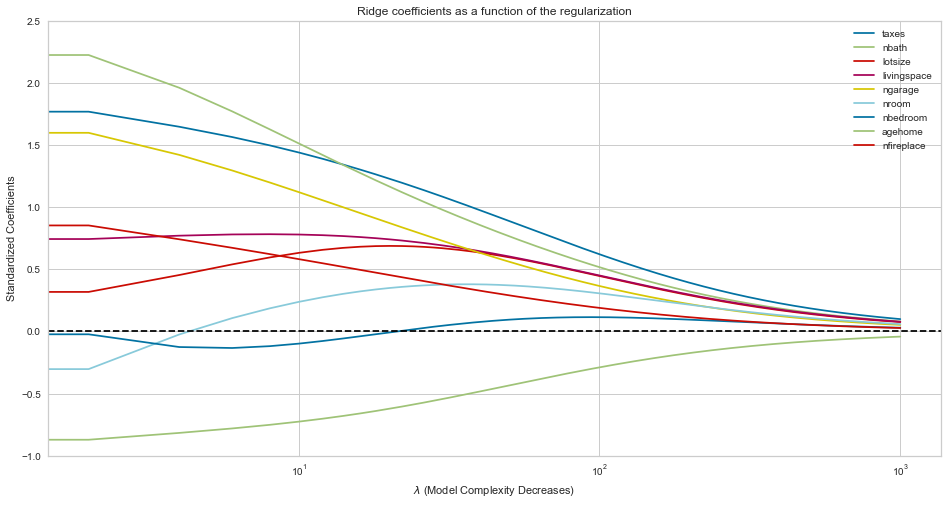

In [116]:
#plot lambda vs ridge coefficients
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

plt.plot(lambdas, coefs_ridge, label=ridge_reg.named_steps['ridge'].feature_names_in_)
plt.ylim((-1,2.5))
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xscale('log')
plt.xlabel('$\lambda$ (Model Complexity Decreases)')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend()
plt.show();

- We see that coefficients to be **close the the least squares estimates** for **small values** of $\lambda$. 
- In addition, as $\lambda$ increases, the size of the coefficients are shrinking towards zero.

## How to Choose Regularization Parameter $\lambda$ ?

- The primary `hyper-parameter` of the ridge regression is `regularization parameter` $\lambda$ which controls the trade-off between model fit and the size of the coefficients.


### Hyper-parameter tuning

- **Step 1:** We split the data as _train+validation_ and _test_ first. 
- **Step 2:** We create a **grid** of possible $\lambda$ values.
- **Step 3:** For each value in $\lambda$ grid, we should **apply the k-fold cross-validation to train+validation set**, and save the ${MSE}_{val}^{(CV)}$ (average of the k MSEs calculated from each folds' validation set).
- **Step 4:** We select $\lambda$ value as **the optimum lambda** which gives the maximum ${R^2}_{val}^{(CV)}$ or minimum ${MSE}_{val}^{(CV)}$.
- Until now, we only estimated the optimum value of the $\lambda$.


<br>

![](img/hyper_paremeter_tuning.png)

### Final Model Performance Evaluation

- **Step 5:** With the selected optimum $\lambda$ value, **RE-TRAIN the model on train + validation set**, and based on the **learned coefficients**, calculate ${R^2}$ or MSE on the test set.
- Steps 1-5 are summarized in the figure above.

In [117]:
#split the data set as train_val and test names
from sklearn.model_selection import train_test_split

#Split 90:10
property_X_train_val, property_X_test, property_y_train_val, property_y_test = train_test_split(property_X, property_y, 
                                                                                                test_size=0.1, random_state=1773)

In [118]:
property_X_train_val.shape

(21, 9)

## GridSearchCV

We will use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) estimator which performs an exhaustive search over specified parameter values for an estimator, instead of writing a for loop as in the previous example (e.g., finding optimum degree in polynomial regression).

 - `estimator`: estimator to be fitted.
 - `param_grid`: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
 - `scoring=None`: Strategy to evaluate the performance of the cross-validated model on the test set.
 - `cv=None`: Determines the cross-validation splitting strategy. 
 - `return_train_score=False`: If False, the cv_results_ attribute will not include training scores.


In [119]:
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

#create your ridge estimator chained with standardscaler
ridge_pipe = make_pipeline(StandardScaler(), Ridge()) 

#create a vector of possible values for lambda
param_grid = {'ridge__alpha' : np.linspace(0.01, 5, 50)} #dictionary_key_value: estimator name-double underscore-hyperparameter name

#create the indices for 3-fold cv
kcv_index = KFold(n_splits=3, shuffle=True, random_state=1773)
    
#instantiate GridSearchCV with ridge_pipe
grid_search = GridSearchCV(estimator = ridge_pipe, param_grid = param_grid, scoring='r2', cv=kcv_index, return_train_score=True) 

In [120]:
#first it searches for the best lambda, then re-fit the model with best lambda and return the coefficients
grid_search.fit(property_X_train_val, property_y_train_val)

GridSearchCV(cv=KFold(n_splits=3, random_state=1773, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.01      , 0.11183673, 0.21367347, 0.3155102 , 0.41734694,
       0.51918367, 0.62102041, 0.72285714, 0.82469388, 0.92653061,
       1.02836735, 1.13020408, 1.23204082, 1.33387755, 1.43571429,
       1.53755102,...
       2.04673469, 2.14857143, 2.25040816, 2.3522449 , 2.45408163,
       2.55591837, 2.6577551 , 2.75959184, 2.86142857, 2.96326531,
       3.06510204, 3.16693878, 3.26877551, 3.37061224, 3.47244898,
       3.57428571, 3.67612245, 3.77795918, 3.87979592, 3.98163265,
       4.08346939, 4.18530612, 4.28714286, 4.38897959, 4.49081633,
       4.59265306, 4.6944898 , 4.79632653, 4.89816327, 5.        ])},
             return_train_score=True, scoring='r2')

In [121]:
#dir(grid_search)

## Analyzing the Results of GridSearchCV

The results of a grid search can be found in the `cv_results_` attribute, which is a dictionary storing all results of the search. 

Each row in the results corresponds to one particular parameter setting. For each setting, the results of all cross-validation splits are recorded.

In [122]:
#you can investigate validation error in each 3 fold for a given alpha
#here test score = validation score
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010770,0.004147,0.006735,0.001344,0.01,{'ridge__alpha': 0.01},-16.714857,0.207366,-0.133613,-5.547035,7.898070,50,0.909680,0.974214,0.974879,0.952924,0.030579
1,0.006882,0.001218,0.003538,0.000408,0.111837,{'ridge__alpha': 0.11183673469387755},-14.338430,0.295414,0.107651,-4.645122,6.854633,49,0.908501,0.973311,0.970550,0.950787,0.029922
2,0.005439,0.000026,0.003054,0.000007,0.213673,{'ridge__alpha': 0.2136734693877551},-13.200170,0.346550,0.217590,-4.212010,6.355807,48,0.907340,0.971896,0.964382,0.947873,0.028825
3,0.005435,0.000122,0.003198,0.000072,0.31551,{'ridge__alpha': 0.31551020408163266},-12.452503,0.380231,0.276164,-3.932036,6.025030,47,0.906390,0.970436,0.958599,0.945141,0.027824
4,0.005412,0.000065,0.003104,0.000055,0.417347,{'ridge__alpha': 0.4173469387755102},-11.882657,0.404343,0.310899,-3.722472,5.770248,46,0.905569,0.969033,0.953554,0.942719,0.027018
5,0.005554,0.000089,0.003174,0.000080,0.519184,{'ridge__alpha': 0.5191836734693878},-11.411917,0.422636,0.333181,-3.552033,5.557897,45,0.904825,0.967703,0.949211,0.940580,0.026385
6,0.005570,0.000157,0.003179,0.000170,0.62102,{'ridge__alpha': 0.6210204081632653},-11.004180,0.437114,0.348361,-3.406235,5.372681,44,0.904126,0.966437,0.945455,0.938673,0.025886
7,0.005477,0.000099,0.003089,0.000030,0.722857,{'ridge__alpha': 0.7228571428571429},-10.640379,0.448939,0.359204,-3.277412,5.206533,43,0.903455,0.965221,0.942179,0.936952,0.025485
8,0.005470,0.000051,0.003177,0.000024,0.824694,{'ridge__alpha': 0.8246938775510204},-10.309357,0.458834,0.367247,-3.161092,5.054725,42,0.902801,0.964045,0.939291,0.935379,0.025155
9,0.006640,0.001391,0.003368,0.000424,0.926531,{'ridge__alpha': 0.926530612244898},-10.004064,0.467270,0.373399,-3.054465,4.914258,41,0.902158,0.962899,0.936719,0.933925,0.024876


In [123]:
#mean train score:cross validated train score, mean test score: cross validated validation score
pd.DataFrame(grid_search.cv_results_)[["param_ridge__alpha","mean_train_score","mean_test_score"]]

,param_ridge__alpha,mean_train_score,mean_test_score
0,0.01,0.952924,-5.547035
1,0.111837,0.950787,-4.645122
2,0.213673,0.947873,-4.212010
3,0.31551,0.945141,-3.932036
4,0.417347,0.942719,-3.722472
5,0.519184,0.940580,-3.552033
6,0.62102,0.938673,-3.406235
7,0.722857,0.936952,-3.277412
8,0.824694,0.935379,-3.161092
9,0.926531,0.933925,-3.054465


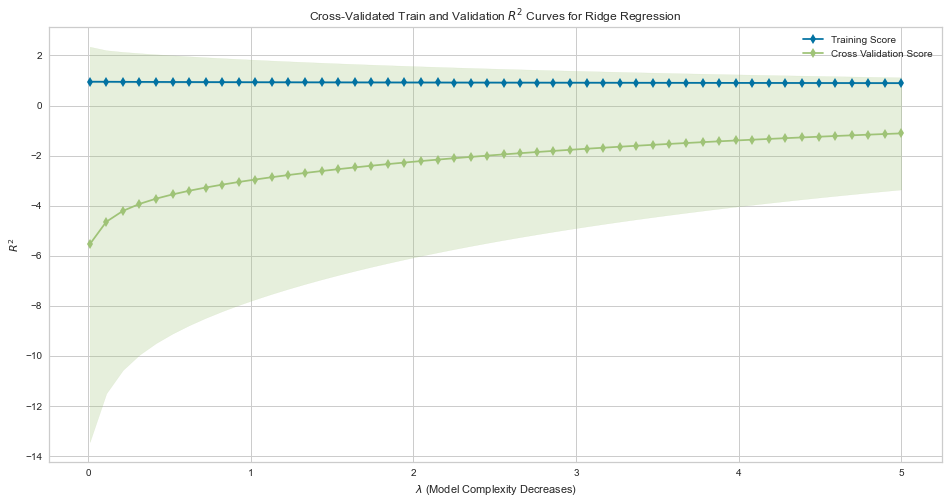

In [124]:
#visualize the results
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

from yellowbrick.model_selection import ValidationCurve

fig, ax = plt.subplots()

#create your ridge estimator integrated with standardscaler
ridge_pipe = make_pipeline(StandardScaler(), Ridge()) 

visual = ValidationCurve(ridge_pipe, param_name='ridge__alpha', 
                         param_range=list(np.linspace(0.01, 5, 50)), 
                         cv=kcv_index, scoring="r2", ax=ax)

# visualize the cross-validated train and validation scores
visual.fit(property_X_train_val, property_y_train_val)

visual.ax.set_title("Cross-Validated Train and Validation $R^2$ Curves for Ridge Regression")
visual.ax.set_ylabel("$R^2$")
visual.ax.set_xlabel('$\lambda$ (Model Complexity Decreases)')
visual.ax.legend().set_visible(True);
#visualizer.show(); #when on:does not return axis labels

As you can see, for small values of $\lambda$, model is over-fitting. The optimum value of $\lambda$ turns out to be 5 which gives the highest cross-validated $R^2$ on the validadation data.

In [125]:
#Parameter setting that gave the best results on the validation data.
print("Optimum λ:", grid_search.best_params_)

Optimum λ: {'ridge__alpha': 5.0}


In [126]:
#print the best estimator
print(grid_search.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])


In [127]:
#Mean cross-validated score of the best_estimator
print("CV R^2_Val:%.4f" % (grid_search.best_score_)) #a very small data set. for that reason, there may be such inconsistiencies.

CV R^2_Val:-1.1127


## Accessing Attributes in a Pipeline inside GridSeachCv

We can inspect the best model's (RE-TRAINED model's) coefficients etc.

In [128]:
#Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the validation data
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])

We can access the steps in a pipeline through `named_steps` attribute as explained earlier.

In [134]:
#print the RE-TRAINED model's (best model's) coefficients
print("Coef names:", grid_search.best_estimator_.named_steps['ridge'].feature_names_in_)
print("Cef values:", grid_search.best_estimator_.named_steps['ridge'].coef_)

Coef names: ['taxes' 'nbath' 'lotsize' 'livingspace' 'ngarage' 'nroom' 'nbedroom'
 'agehome' 'nfireplace']
Cef values: [ 1.60412141  1.86046766  0.50138063  0.77732668  1.35463249  0.05067452
 -0.13391913 -0.79732757  0.70496374]


In [130]:
print("R2 on bigtrain data: %.4f" % grid_search.best_estimator_.score(property_X_train, property_y_train))

R2 on bigtrain data: 0.8577


In [131]:
print("R2 on test data: %.4f" % grid_search.best_estimator_.score(property_X_test, property_y_test))

R2 on test data: 0.8112


In [132]:
#the same way. However, students prefer the above
print("R2 on test data: %.4f" % grid_search.score(property_X_test, property_y_test))

R2 on test data: 0.8112


While retaining the correlated features ('nroom', 'taxes') in the model, but, decreasing magnitude of their coefficient in the model, we reached an $R^2$ value of 81%  on test. On Week 03, we reached this amount of performance after several steps. Those approaches are called as `discrete model choice`, while ridge regression is a `continuous model choice` approach.

## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/
- Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: A guide for data scientists. O'Reilly Media, Inc.
- https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/tree/main/notebooks

## Appendix 

## Note: Scaling does not affect predictive performance of ordinary linear regression models

In regression models, pre-processing does not change the model's predictive performance since the **fitted value** vector of $\mathbf{\mathbf{Y}}$ is not affected by scaling:

\begin{eqnarray}
\hat{\mathbf{Y}} = \mathbf{X}\hat{\boldsymbol{\theta}} =  \mathbf{X} (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}.\nonumber
\end{eqnarray}

For example, scale $\mathbf{X}$ by 1/n, you would get the same $\hat{\mathbf{Y}}$:

\begin{eqnarray}
\hat{\mathbf{Y}} = \frac{\mathbf{X}}{n}  \big(\frac{\mathbf{X}}{n}^{T}\frac{\mathbf{X}}{n}\big)^{-1}\frac{\mathbf{X}}{n}^{T} \mathbf{Y}\nonumber
                 = \mathbf{X} (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}.
\end{eqnarray}

For that reason, before or after the scaling, no matter, in linear regression models, you will get the same $R^2$ and MSE value.

In [133]:
import session_info
session_info.show()